In [1]:
%matplotlib inline
import matplotlib.style
import matplotlib as mpl
from pylab import *

rcParams['font.size']=18
rcParams['figure.facecolor']='white'

from Tau_Decay_Pythia_Simulator import Tau_Decay_Simulator


In [2]:
TDS = Tau_Decay_Simulator()

Reading negativepolnew.txt
All possible daughters of the tau decay (within 10k decays): [16, -211, 211, 11, -12, 111, 13, -14, -311, -321, 130, 310, 22, 311, 221, 321, 223, -323]


0.04671174702410525
0.0322060761115


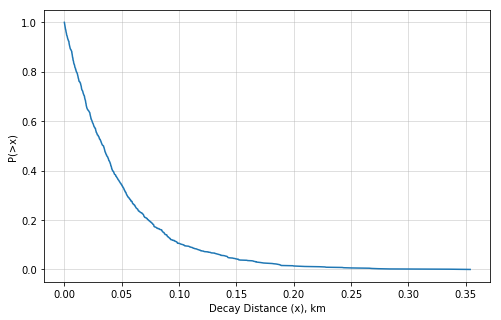

In [3]:
E_tau_eV = 1.e15
vals = TDS.sample_range(E_tau_eV, 1000)
print np.mean(vals)
u = (np.cumsum(np.ones(len(vals)))-1.) / (float(len(vals))-1.)
#hist(vals)
figure(figsize=(8,5))
plot(np.sort(vals), 1.-u)
grid(True, which='both', alpha=0.5)
xlabel('Decay Distance (x), km')
ylabel('P(>x)')

print TDS.sample_range(E_tau_eV, None)


In [4]:
shower_energy_fractions = TDS.sample_energy_fraction(num_events=100000)

(0, 1)

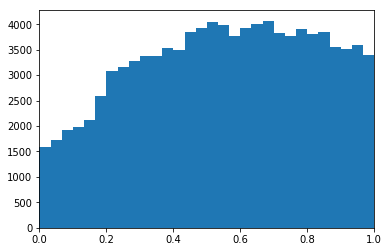

In [5]:
bins = (TDS.shower_energybins[:-1] + TDS.shower_energybins[1:])/2.
p = TDS.shower_frac
samps = np.random.choice(bins,100000, p=p)
ret = hist(samps,30)
plt.xlim(0,1)

Text(0.5,0,'Fraction of Tau Energy')

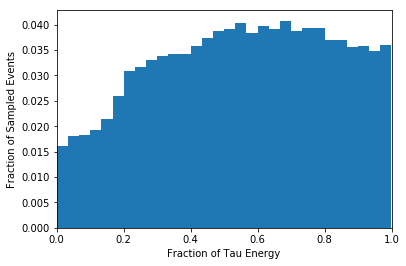

In [6]:
figure()
ret = hist(shower_energy_fractions,30,weights=np.ones(len(shower_energy_fractions))/float(len(shower_energy_fractions)))
plt.xlim(0,1)
plt.ylabel(r"Fraction of Sampled Events")
plt.xlabel(r"Fraction of Tau Energy")

In [7]:
hadron_energy_fractions = TDS.sample_energy_fraction(num_events=100000, type='hadron')

Text(0.5,0,'Fraction of Tau Energy')

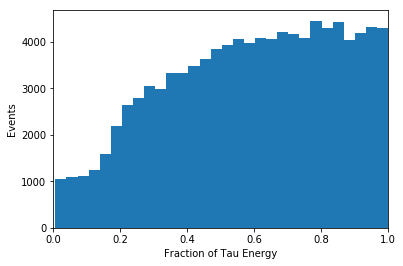

In [8]:
figure()
ret = hist(hadron_energy_fractions,30)
plt.xlim(0,1)
plt.ylabel(r"Events")
plt.xlabel(r"Fraction of Tau Energy")

In [9]:
em_energy_fractions = TDS.sample_energy_fraction(num_events=1000000, type='em')

Text(0.5,0,'Fraction of Tau Energy')

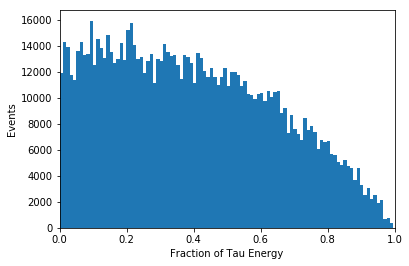

In [10]:
figure()
ret = hist(em_energy_fractions,100)
plt.xlim(0,1)
plt.ylabel(r"Events")
plt.xlabel(r"Fraction of Tau Energy")

In [11]:
TDS_n = Tau_Decay_Simulator(pol='negative')
TDS_p = Tau_Decay_Simulator(pol='positive')

Reading negativepolnew.txt
All possible daughters of the tau decay (within 10k decays): [16, -211, 211, 11, -12, 111, 13, -14, -311, -321, 130, 310, 22, 311, 221, 321, 223, -323]
Reading positivepolnew.txt
All possible daughters of the tau decay (within 10k decays): [16, -211, 211, 111, 11, -12, 13, -14, -321, -311, 321, 22, 310, 311, 130, 221, 223, -323]


In [41]:
neg_shower_energy_fractions = TDS_n.sample_energy_fraction(num_events=100000)
pos_shower_energy_fractions = TDS_p.sample_energy_fraction(num_events=100000)

neg_hadron_energy_fractions = TDS_n.sample_energy_fraction(type='hadron',num_events=100000)
pos_hadron_energy_fractions = TDS_p.sample_energy_fraction(type='hadron',num_events=100000)

neg_em_energy_fractions = TDS_n.sample_energy_fraction(type='em',num_events=100000)
pos_em_energy_fractions = TDS_p.sample_energy_fraction(type='em',num_events=100000)

Text(0.5,1,'')

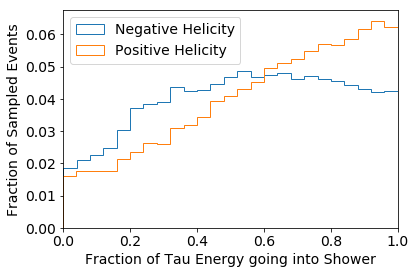

In [33]:
rcParams['font.size']=14
figure()
ret = hist(neg_shower_energy_fractions,25,histtype='step',label='Negative Helicity',
           weights=np.ones(len(neg_shower_energy_fractions))/float(len(neg_shower_energy_fractions)))
ret = hist(pos_shower_energy_fractions,25,histtype='step',label='Positive Helicity',
           weights=np.ones(len(pos_shower_energy_fractions))/float(len(pos_shower_energy_fractions)))

plt.xlim(0,1)
plt.legend(loc='upper left')
plt.ylabel(r"Fraction of Sampled Events")
plt.xlabel(r"Fraction of Tau Energy going into Shower")
plt.title("")

Text(0.5,1,'')

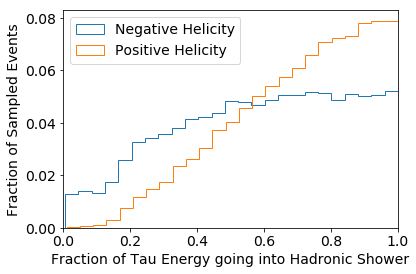

In [42]:
rcParams['font.size']=14
figure()
ret = hist(neg_hadron_energy_fractions,25,histtype='step',label='Negative Helicity',
           weights=np.ones(len(neg_hadron_energy_fractions))/float(len(neg_hadron_energy_fractions)))
ret = hist(pos_hadron_energy_fractions,25,histtype='step',label='Positive Helicity',
           weights=np.ones(len(pos_hadron_energy_fractions))/float(len(pos_hadron_energy_fractions)))

plt.xlim(0,1)
plt.legend(loc='upper left')
plt.ylabel(r"Fraction of Sampled Events")
plt.xlabel(r"Fraction of Tau Energy going into Hadronic Shower")
plt.title("")

Text(0.5,1,'')

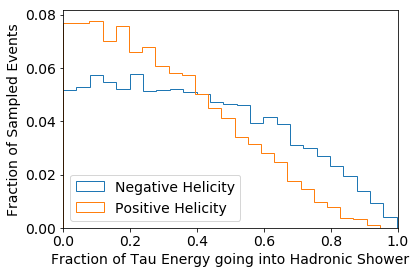

In [44]:
rcParams['font.size']=14
figure()
ret = hist(neg_em_energy_fractions,25,histtype='step',label='Negative Helicity',
           weights=np.ones(len(neg_em_energy_fractions))/float(len(neg_em_energy_fractions)))
ret = hist(pos_em_energy_fractions,25,histtype='step',label='Positive Helicity',
           weights=np.ones(len(pos_em_energy_fractions))/float(len(pos_em_energy_fractions)))

plt.xlim(0,1)
plt.legend(loc='lower left')
plt.ylabel(r"Fraction of Sampled Events")
plt.xlabel(r"Fraction of Tau Energy going into Hadronic Shower")
plt.title("")

Text(0.5,1,'')

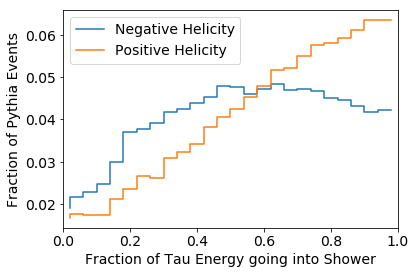

In [37]:
figure()
bins, weights = TDS_n.energy_fraction(type='shower',rebin_factor=400)
plt.step(bins, weights,label='Negative Helicity',)
bins, weights = TDS_p.energy_fraction(type='shower',rebin_factor=400)
plt.step(bins, weights,label='Positive Helicity',)
plt.xlim(0,1)
plt.legend(loc='upper left')
plt.ylabel(r"Fraction of Pythia Events")
plt.xlabel(r"Fraction of Tau Energy going into Shower")
plt.title("")

Text(0.5,1,'')

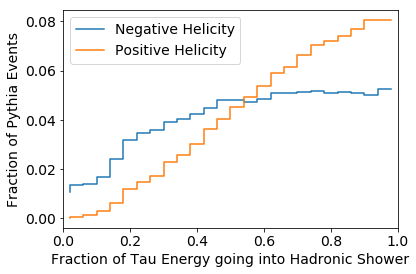

In [38]:
figure()
bins, weights = TDS_n.energy_fraction(type='hadron',rebin_factor=400)
plt.step(bins, weights,label='Negative Helicity',)
bins, weights = TDS_p.energy_fraction(type='hadron',rebin_factor=400)
plt.step(bins, weights,label='Positive Helicity',)
plt.xlim(0,1)
plt.legend(loc='upper left')
plt.ylabel(r"Fraction of Pythia Events")
plt.xlabel(r"Fraction of Tau Energy going into Hadronic Shower")
plt.title("")

Text(0.5,1,'')

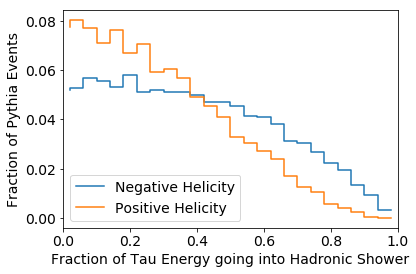

In [40]:
figure()
bins, weights = TDS_n.energy_fraction(type='em',rebin_factor=400)
plt.step(bins, weights,label='Negative Helicity',)
bins, weights = TDS_p.energy_fraction(type='em',rebin_factor=400)
plt.step(bins, weights,label='Positive Helicity',)
plt.xlim(0,1)
plt.legend(loc='lower left')
plt.ylabel(r"Fraction of Pythia Events")
plt.xlabel(r"Fraction of Tau Energy going into Hadronic Shower")
plt.title("")